# Tree-Based Models on Heart Dataset

This notebook demonstrates Decision Trees and Random Forests for classification using Scikit-learn.

In [42]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
import graphviz


In [43]:

from google.colab import files # Import files from google.colab

# Upload file
uploaded = files.upload()

# Load dataset
df = pd.read_csv("heart.csv")

# Display first 5 rows
df.head()




Saving heart.csv to heart (5).csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [44]:
# Features and target
X = df.drop("target", axis=1)
y = df["target"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## Step 1. Train a Decision Tree Classifier and Visualize

Train Accuracy: 1.0
Test Accuracy: 0.9805194805194806


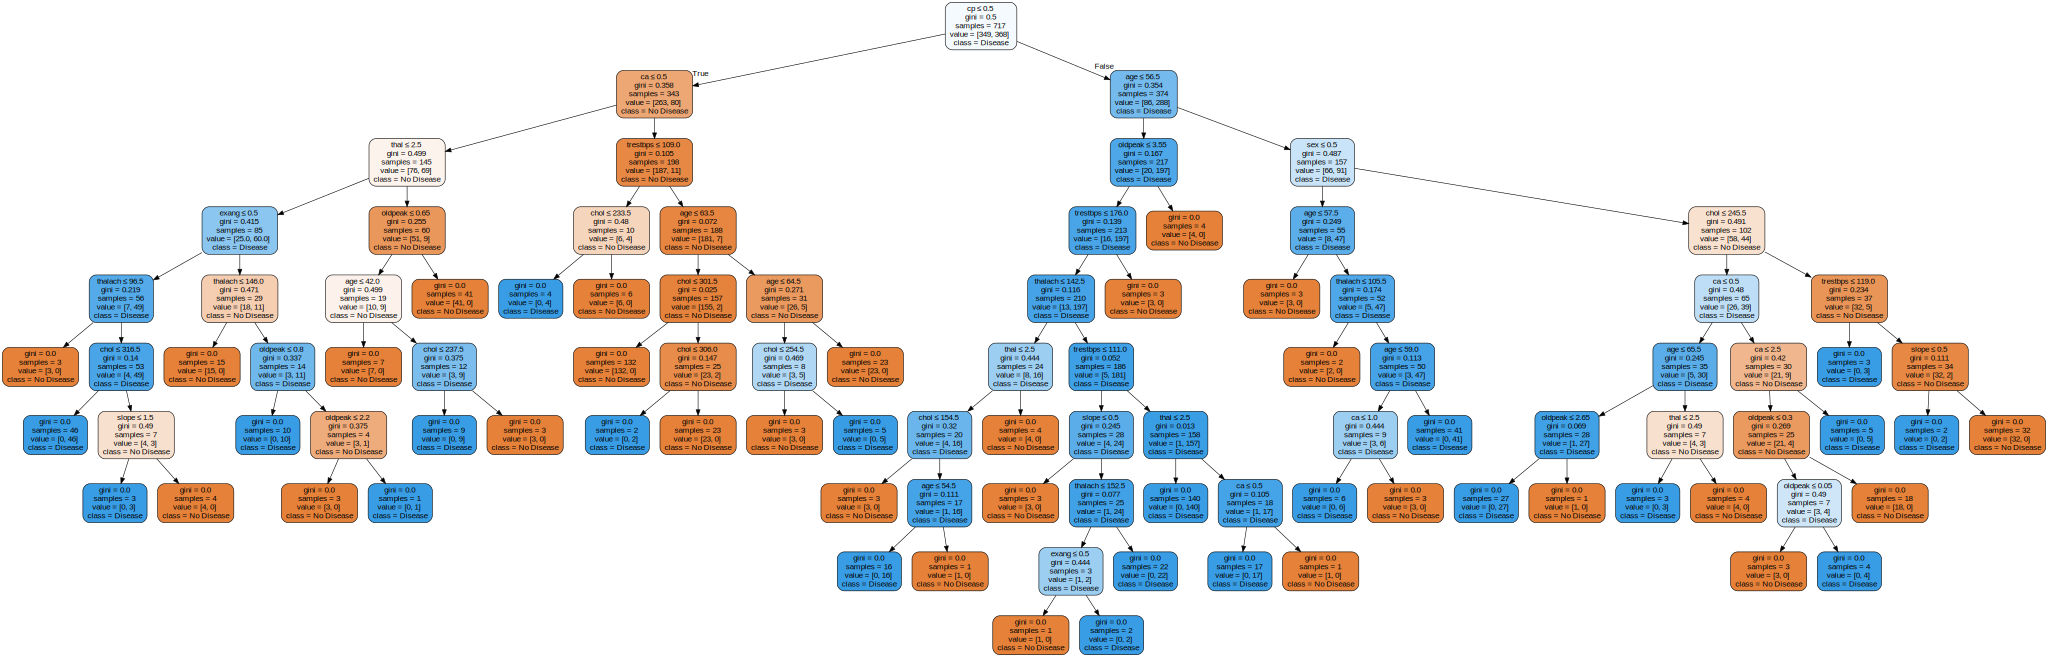

In [45]:

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

print("Train Accuracy:", dt.score(X_train, y_train))
print("Test Accuracy:", dt.score(X_test, y_test))

dot_data = export_graphviz(
    dt, out_file=None, feature_names=X.columns, class_names=["No Disease", "Disease"],
    filled=True, rounded=True, special_characters=True
)
graph = graphviz.Source(dot_data)
graph


## Step 2. Overfitting Analysis with Tree Depth

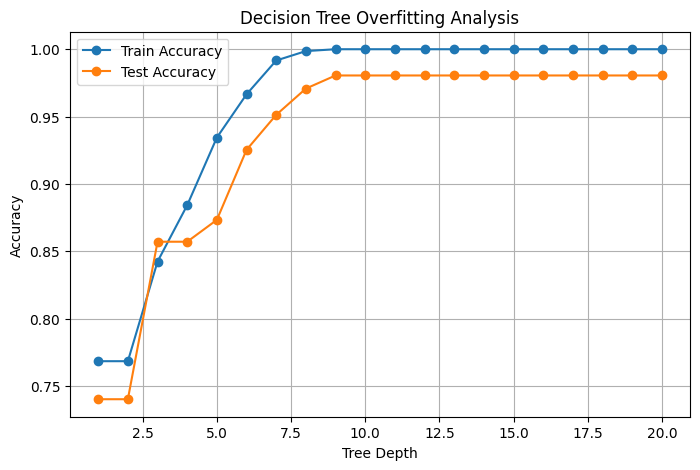

In [46]:

train_scores = []
test_scores = []
depths = range(1, 21)

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(depths, train_scores, label="Train Accuracy", marker="o")
plt.plot(depths, test_scores, label="Test Accuracy", marker="o")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Overfitting Analysis")
plt.legend()
plt.grid(True)
plt.show()


## Step 3. Random Forest vs Decision Tree

In [47]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Decision Tree Test Accuracy:", dt.score(X_test, y_test))
print("Random Forest Test Accuracy:", rf.score(X_test, y_test))


Decision Tree Test Accuracy: 0.9805194805194806
Random Forest Test Accuracy: 0.9805194805194806


## Step 4. Feature Importances

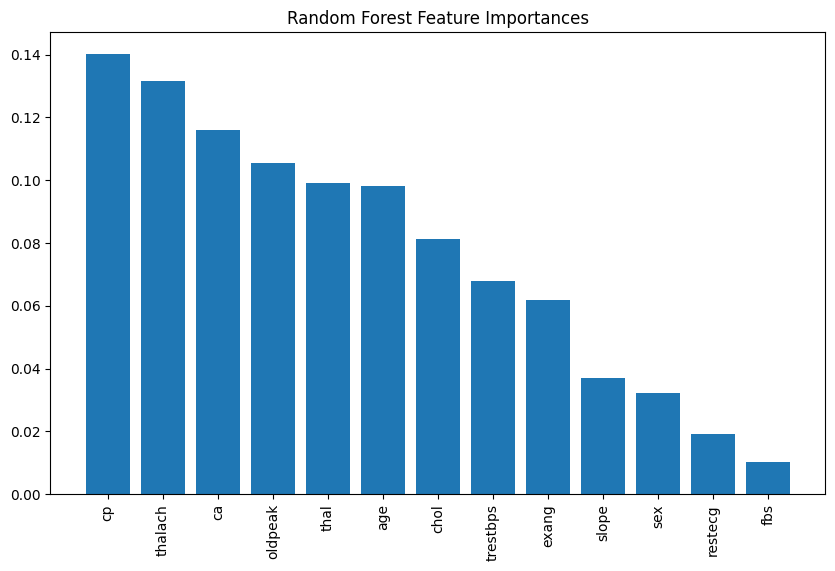

In [48]:

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Random Forest Feature Importances")
plt.show()


## Step 5. Cross-validation Evaluation

In [49]:

dt_scores = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=5)
rf_scores = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=5)

print("Decision Tree CV Accuracy: %.3f ± %.3f" % (dt_scores.mean(), dt_scores.std()))
print("Random Forest CV Accuracy: %.3f ± %.3f" % (rf_scores.mean(), rf_scores.std()))


Decision Tree CV Accuracy: 1.000 ± 0.000
Random Forest CV Accuracy: 0.997 ± 0.006
